inplement needed libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

add the csv file

In [2]:
from google.colab import files
upload = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


read the data i the file

In [3]:
f_data = pd.read_csv('student_habits_performance.csv')
f_data.head(6)

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   
5      S1005   24    Male                  7.2                 1.3   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   
5            0.0            No                   82.9          7.4   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   
5         Fair                   1                   Master          Average   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4  
5                     4                            No       100.0

see if their is any missing data

In [4]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

rename titles

In [5]:
f_data = f_data.rename(columns={
    'student_id': 'ID',
    'study_hours_per_day': 'Huors/Day',
    'social_media_hours': 'social media',
    'netflix_hours': 'netflix',
    'part_time_job': 'part time job',
    'attendance_percentage': 'attendance',
    'sleep_hours':'sleep',
    'diet_quality':'diet',
    'exercise_frequency':'exercise/week',
    'parental_education_level':'education level',
    'internet_quality':'internet',
    'mental_health_rating':'mental health rating',
    'extracurricular_participation':'participation',
    'exam_score':'Score',
})
print(f_data.columns)

Index(['ID', 'age', 'gender', 'Huors/Day', 'social media', 'netflix',
       'part time job', 'attendance', 'sleep', 'diet', 'exercise/week',
       'education level', 'internet', 'mental health rating', 'participation',
       'Score'],
      dtype='object')


showing data

In [6]:
f_data.head(6)

ID  age  gender  Huors/Day  social media  netflix part time job  \
0  S1000   23  Female        0.0           1.2      1.1            No   
1  S1001   20  Female        6.9           2.8      2.3            No   
2  S1002   21    Male        1.4           3.1      1.3            No   
3  S1003   23  Female        1.0           3.9      1.0            No   
4  S1004   19  Female        5.0           4.4      0.5            No   
5  S1005   24    Male        7.2           1.3      0.0            No   

   attendance  sleep  diet  exercise/week education level internet  \
0        85.0    8.0  Fair              6          Master  Average   
1        97.3    4.6  Good              6     High School  Average   
2        94.8    8.0  Poor              1     High School     Poor   
3        71.0    9.2  Poor              4          Master     Good   
4        90.9    4.9  Fair              3          Master     Good   
5        82.9    7.4  Fair              1          Master  Average   

   mental health rating participation  Score  
0                     8           Yes   56.2  
1                     8            No  100.0  
2                     1            No   34.3  
3                     1           Yes   26.8  
4                     1            No   66.4  
5                     4            No  100.0

see the unique values under each colum then see if thier any value should be changed or not

In [7]:
print(f_data['age'].unique())

[23 20 21 19 24 18 22 17]


In [8]:
print(f_data['gender'].unique())

['Female' 'Male' 'Other']


In [9]:
print(f_data['Huors/Day'].unique())

[0.  6.9 1.4 1.  5.  7.2 5.6 4.3 4.4 4.8 4.6 3.9 3.7 3.4 2.4 3.1 2.  1.8
 3.8 4.9 1.1 3.2 1.5 2.6 4.  4.2 3.5 5.5 2.9 3.6 2.5 6.1 1.6 5.4 2.2 6.7
 1.7 4.5 4.1 3.3 6.8 2.7 7.4 2.3 6.  5.9 1.2 0.5 5.3 2.1 5.1 1.9 3.  7.
 0.7 0.3 4.7 5.8 5.7 1.3 0.8 2.8 6.2 6.5 0.6 6.6 0.9 7.3 6.3 5.2 8.3 6.4
 0.2 7.5 8.2 7.6 0.1 7.1]


In [10]:
print(f_data['social media'].unique())

[1.2 2.8 3.1 3.9 4.4 1.3 1.5 1.  2.2 3.7 2.4 2.1 2.7 5.  0.6 4.9 2.5 2.3
 4.1 0.  4.3 0.8 2.  3.2 0.9 1.7 3.  4.7 3.4 1.4 2.9 3.6 1.9 4.2 1.8 0.3
 0.1 3.3 2.6 4.  0.4 1.1 4.6 0.7 3.8 6.2 3.5 4.5 0.5 1.6 5.3 0.2 6.  6.1
 5.4 5.6 4.8 5.7 5.2 7.2]


In [11]:
print(f_data['netflix'].unique())

[1.1 2.3 1.3 1.  0.5 0.  1.4 2.  1.7 0.8 2.5 0.4 2.7 0.7 0.2 1.2 2.9 2.4
 0.6 0.9 3.3 2.8 3.8 2.6 4.3 0.1 3.2 3.1 3.6 3.5 2.1 1.8 3.9 5.  3.  1.6
 2.2 3.4 1.5 1.9 3.7 4.1 4.4 0.3 4.2 4.  4.6 4.5 5.4 5.3 4.9]


In [12]:
print(f_data['part time job'].unique())

['No' 'Yes']


In [13]:
print(f_data['attendance'].unique())

[ 85.   97.3  94.8  71.   90.9  82.9  85.8  77.7 100.   95.4  77.6  71.7
  81.1  89.3  87.4  97.5  92.9  94.7  88.3  71.1  83.   95.6  84.5  90.
  81.8  74.7  83.8  88.1  78.4  82.6  75.6  96.2  82.1  99.5  84.2  74.9
  64.1  70.3  71.3  98.8  86.2  88.9  62.8  73.   93.9  87.9  83.5  90.6
  82.8  85.7  86.9  64.   91.8  83.9  90.7  92.1  93.1  76.5  80.8  80.5
  67.   81.7  92.3  72.3  95.5  89.9  83.6  85.1  79.9  86.6  89.   84.4
  83.1  69.   72.7  80.6  97.9  72.6  90.4  92.2  78.1  88.8  68.1  83.3
  76.9  93.3  95.7  64.3  84.8  88.5  88.4  82.3  72.8  73.8  85.2  81.9
  81.6  71.6  92.4  85.3  73.2  91.1  69.4  87.   86.   85.4  99.8  75.1
  86.4  74.3  94.6  90.1  77.9  66.8  81.5  77.3  95.3  87.5  85.5  80.2
  84.6  83.7  90.2  79.1  69.2  93.2  71.2  82.4  84.3  91.9  78.2  84.9
  86.5  89.4  93.4  89.5  89.8  79.3  80.9  94.1  92.5  79.7  76.3  83.2
  73.7  87.7  84.1  80.   75.   90.5  72.   66.5  87.2  88.7  65.4  81.3
  87.1  75.8  78.6  80.7  94.3  92.7  96.6  85.6  86

In [14]:
print(f_data['sleep'].unique())

[ 8.   4.6  9.2  4.9  7.4  6.5  7.1  7.5  5.8  7.9  4.5  4.7  6.7  5.6
  6.4  7.2  6.   9.   5.5  4.8  8.1  6.9  7.7  7.3  3.9  7.   5.7  8.5
  6.8  5.3  8.4  8.9  5.   5.1  5.2  5.4  6.2  6.1  7.8  9.1  6.3  9.5
  6.6  4.1  7.6  8.3  8.2  9.7  9.4  5.9  9.3  8.7  8.8  4.4  3.2  3.5
  4.2  9.8  4.   8.6  3.7  4.3  3.4  3.8  3.6  3.3 10.   9.6]


In [15]:
print(f_data['diet'].unique())

['Fair' 'Good' 'Poor']


In [16]:
print(f_data['exercise/week'].unique())

[6 1 4 3 2 0 5]


In [17]:
print(f_data['education level'].unique())

['Master' 'High School' 'Bachelor' nan]


In [18]:
print(f_data['internet'].unique())

['Average' 'Poor' 'Good']


In [19]:
print(f_data['mental health rating'].unique())

[ 8  1  4 10  3  9  7  5  2  6]


In [20]:
print(f_data['participation'].unique())

['Yes' 'No']


In [21]:
print(f_data['Score'].unique())

[ 56.2 100.   34.3  26.8  66.4  89.8  72.6  78.9  63.3  74.4  76.9  75.8
  74.   55.2  70.8  43.9  45.3  58.5  82.5  98.7  43.7  54.9  69.9  73.5
  71.1  82.8  75.7  70.6  51.3  52.1  70.7  51.2  59.4  58.1  82.3  69.7
  66.   63.5  65.7  78.5  75.1  71.   59.7  52.6  96.5  62.   48.4  68.1
  87.2  66.7  75.2  46.4  97.1  61.2  75.   94.7  77.6  68.6  69.6  66.5
  62.2  82.1  55.1  77.1  97.7  66.9  99.9  57.2  77.3  91.6  57.6  60.2
  50.5  53.5  79.2  47.2  73.4  41.1  77.8  63.4  70.2  81.3  50.2  87.9
  80.9  63.9  65.6  93.2  60.8  50.4  74.3  32.8  60.4  60.   77.5  86.5
  83.3  82.7  94.8  80.8  58.3  66.3  60.5  84.8  77.   61.7  44.   42.4
  88.   48.7  81.6  78.4  67.6  64.7  64.1  83.5  96.2  65.4  46.7  75.5
  78.1  85.2  75.4  64.2  90.3  81.4  65.   57.3  57.7  56.7  62.3  77.9
  65.2  76.8  83.8  63.1  39.   72.2  50.1  62.4  96.6  85.8  68.3  69.3
  65.3  55.   69.2  67.4  79.9  85.7  40.4  73.8  46.5  55.4  45.1  69.4
  66.6  26.7  64.5  87.1  42.2  61.6  81.9  85.1  5

In [22]:
f_data = f_data.rename(columns={
     'Huors/Day':'Study hours',
})

now we are going to change every float value to the nearest int

In [23]:
f_data['sleep'] = f_data['sleep'].round().astype(int)
print(f_data['sleep'].unique())

[ 8  5  9  7  6  4 10  3]


In [24]:
f_data['Study hours'] = f_data['Study hours'].round().astype(int)
print(f_data['Study hours'].unique())

[0 7 1 5 6 4 3 2 8]


In [25]:
f_data['social media'] = f_data['social media'].round().astype(int)
print(f_data['social media'].unique())

[1 3 4 2 5 0 6 7]


In [26]:
f_data['netflix'] = f_data['netflix'].round().astype(int)
print(f_data['netflix'].unique())

[1 2 0 3 4 5]


In [27]:
f_data['attendance'] = f_data['attendance'].round().astype(int)
print(f_data['attendance'].unique())

[ 85  97  95  71  91  83  86  78 100  72  81  89  87  98  93  88  96  84
  90  82  75  76  64  70  99  63  73  94  92  80  67  69  68  77  74  79
  66  65  62  61  60  58  57  56]


In [28]:
f_data['Score'] = f_data['Score'].round().astype(int)
print(f_data['Score'].unique())

[ 56 100  34  27  66  90  73  79  63  74  77  76  55  71  44  45  58  82
  99  70  83  51  52  59  64  78  75  60  53  96  62  48  68  87  67  46
  97  61  95  69  98  57  92  50  54  47  41  81  88  93  33  86  85  42
  49  65  84  39  72  80  40  30  89  94  91  18  28  23  36  26  43  32
  35  37  38  31]


In [29]:
f_data.head(6)

ID  age  gender  Study hours  social media  netflix part time job  \
0  S1000   23  Female            0             1        1            No   
1  S1001   20  Female            7             3        2            No   
2  S1002   21    Male            1             3        1            No   
3  S1003   23  Female            1             4        1            No   
4  S1004   19  Female            5             4        0            No   
5  S1005   24    Male            7             1        0            No   

   attendance  sleep  diet  exercise/week education level internet  \
0          85      8  Fair              6          Master  Average   
1          97      5  Good              6     High School  Average   
2          95      8  Poor              1     High School     Poor   
3          71      9  Poor              4          Master     Good   
4          91      5  Fair              3          Master     Good   
5          83      7  Fair              1          Master  Average   

   mental health rating participation  Score  
0                     8           Yes     56  
1                     8            No    100  
2                     1            No     34  
3                     1           Yes     27  
4                     1            No     66  
5                     4            No    100

now we are gong to check the data of each colum agin

In [30]:
print(f_data['ID'].head())

0    S1000
1    S1001
2    S1002
3    S1003
4    S1004
Name: ID, dtype: object


In [31]:
print(f_data['age'].head())

0    23
1    20
2    21
3    23
4    19
Name: age, dtype: int64


In [32]:
print(f_data['gender'].head())

0    Female
1    Female
2      Male
3    Female
4    Female
Name: gender, dtype: object


In [33]:
print(f_data['Study hours'].head())

0    0
1    7
2    1
3    1
4    5
Name: Study hours, dtype: int64


In [34]:
print(f_data['social media'].head())

0    1
1    3
2    3
3    4
4    4
Name: social media, dtype: int64


In [35]:
print(f_data['netflix'].head())

0    1
1    2
2    1
3    1
4    0
Name: netflix, dtype: int64


In [36]:
print(f_data['part time job'].head())

0    No
1    No
2    No
3    No
4    No
Name: part time job, dtype: object


In [37]:
print(f_data['attendance'].head())

0    85
1    97
2    95
3    71
4    91
Name: attendance, dtype: int64


In [38]:
print(f_data['sleep'].head())

0    8
1    5
2    8
3    9
4    5
Name: sleep, dtype: int64


In [39]:
print(f_data['diet'].head())

0    Fair
1    Good
2    Poor
3    Poor
4    Fair
Name: diet, dtype: object


In [40]:
print(f_data['exercise/week'].head())

0    6
1    6
2    1
3    4
4    3
Name: exercise/week, dtype: int64


In [41]:
print(f_data['education level'].head())

0         Master
1    High School
2    High School
3         Master
4         Master
Name: education level, dtype: object


In [42]:
print(f_data['internet'].head())

0    Average
1    Average
2       Poor
3       Good
4       Good
Name: internet, dtype: object


In [43]:
print(f_data['mental health rating'].head())

0    8
1    8
2    1
3    1
4    1
Name: mental health rating, dtype: int64


In [44]:
print(f_data['participation'].head())

0    Yes
1     No
2     No
3    Yes
4     No
Name: participation, dtype: object


In [45]:
print(f_data['Score'].head())

0     56
1    100
2     34
3     27
4     66
Name: Score, dtype: int64


graphs

Study hours VS Score

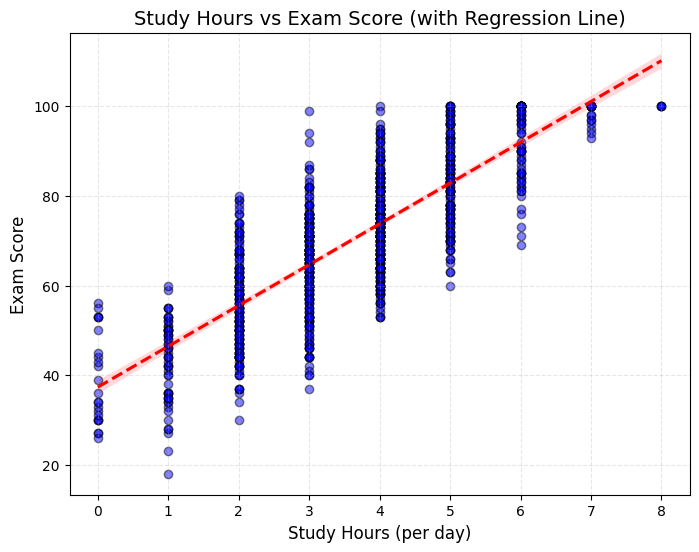

In [46]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Study hours',
    y='Score',
    data=f_data,
    scatter_kws={'color': 'blue', 'alpha': 0.5, 'edgecolor': 'black'},
    line_kws={'color': 'red', 'linestyle': '--'}
)
plt.title('Study Hours vs Exam Score (with Regression Line)', fontsize=14)
plt.xlabel('Study Hours (per day)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Social Meadia VS Scores

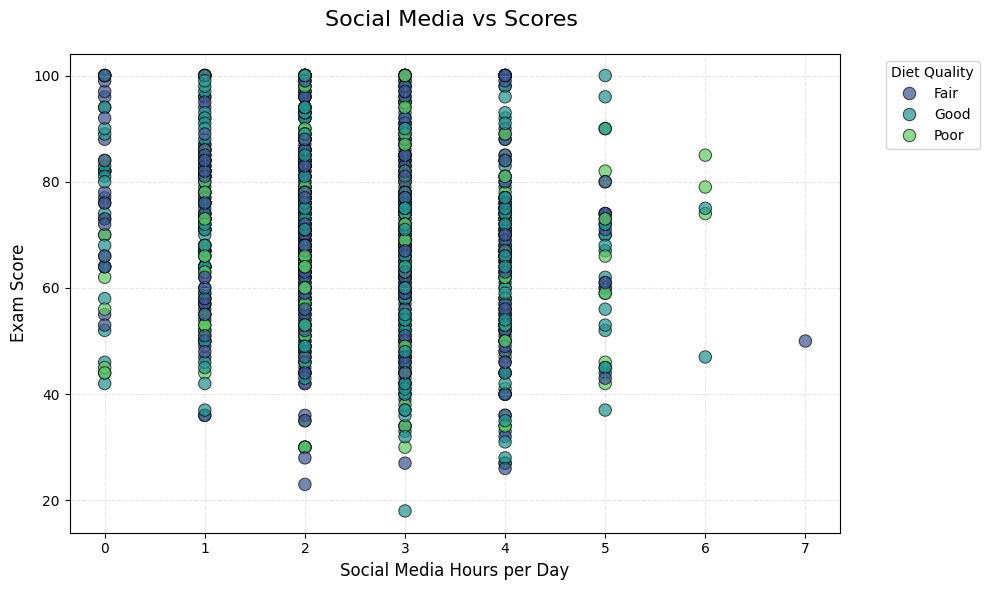

In [49]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='social media',
    y='Score',
    data=f_data,
    hue='diet',
    palette='viridis',
    alpha=0.7,
    s=80,
    edgecolor='black'
)
plt.title('Social Media vs Scores ', fontsize=16, pad=20)
plt.xlabel('Social Media Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Diet Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Netflix VS Scores

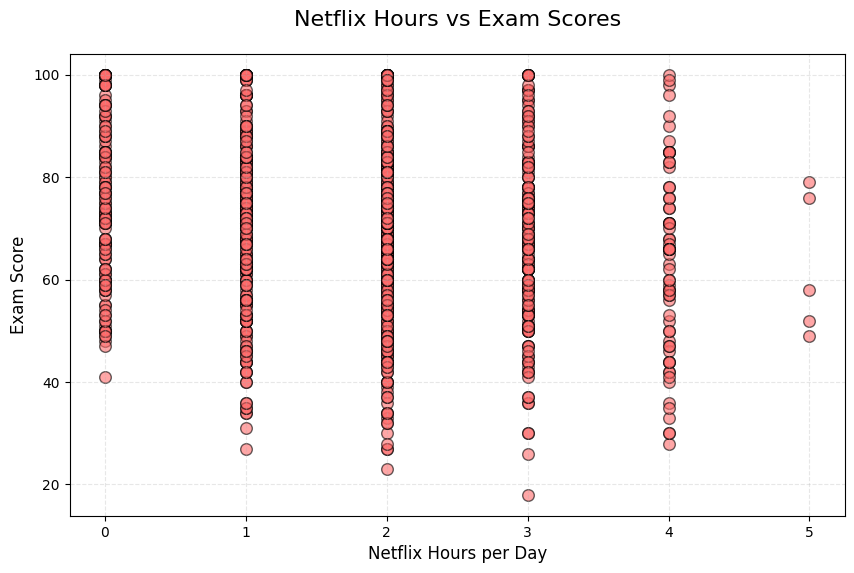

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['netflix'],
    y=f_data['Score'],
    c='#FF6B6B',
    alpha=0.6,
    edgecolor='black',
    s=70
)
plt.title('Netflix Hours vs Exam Scores', fontsize=16, pad=20)
plt.xlabel('Netflix Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Sleeping hours VS Scores

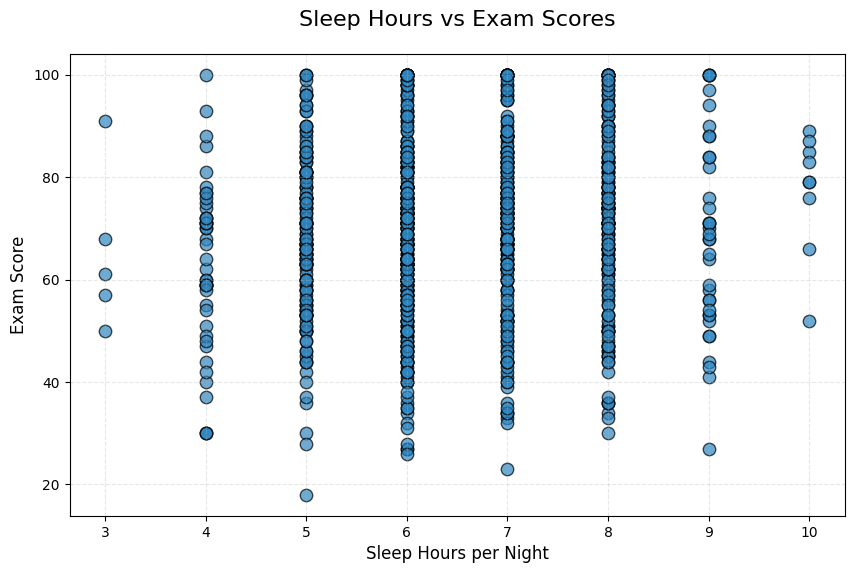

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['sleep'],
    y=f_data['Score'],
    c='#2E86C1',
    alpha=0.7,
    edgecolor='black',
    s=80
)
plt.title('Sleep Hours vs Exam Scores', fontsize=16, pad=20)
plt.xlabel('Sleep Hours per Night', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(range(3, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Attendance VS Socres

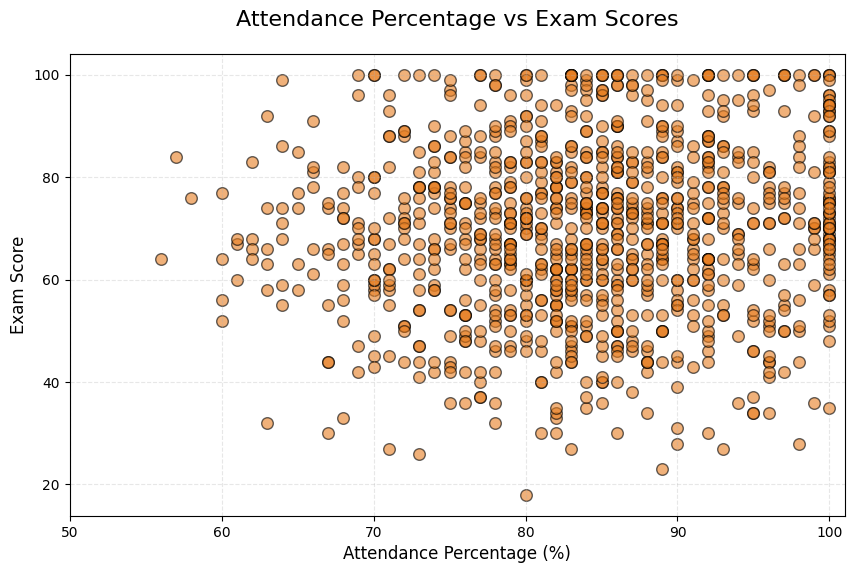

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['attendance'],
    y=f_data['Score'],
    c='#E67E22',
    alpha=0.6,
    edgecolor='black',
    s=70
)
plt.title('Attendance Percentage vs Exam Scores', fontsize=16, pad=20)
plt.xlabel('Attendance Percentage (%)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xlim(50, 101)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Exercise VS Scores

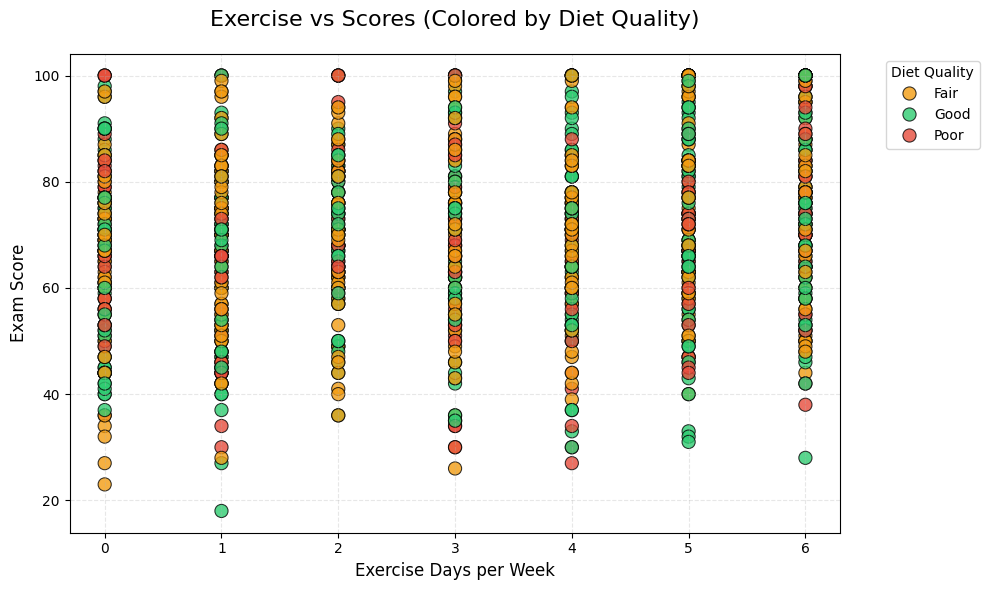

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='exercise/week',
    y='Score',
    data=f_data,
    hue='diet',
    palette={'Poor': '#E74C3C', 'Fair': '#F39C12', 'Good': '#2ECC71'},
    alpha=0.8,
    s=90,
    edgecolor='black'
)
plt.title('Exercise vs Scores (Colored by Diet Quality)', fontsize=16, pad=20)
plt.xlabel('Exercise Days per Week', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(range(0, 7))
plt.legend(title='Diet Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Mental health VS socres

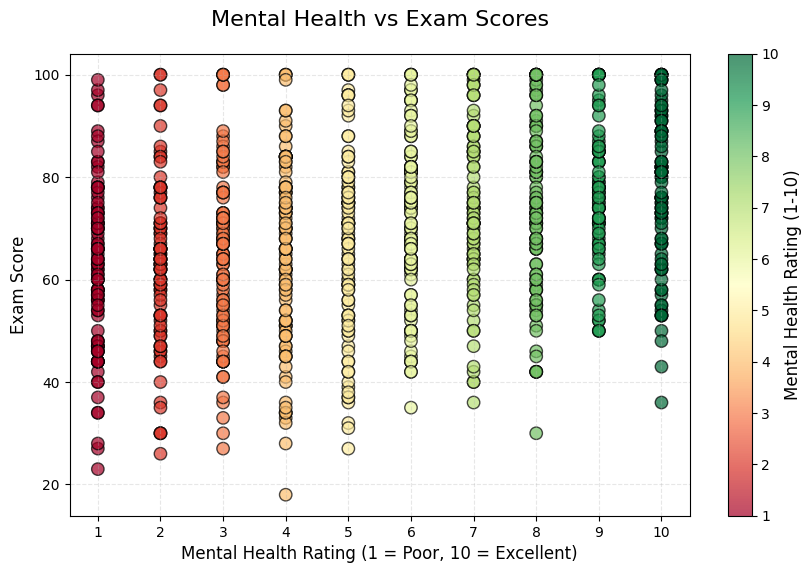

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=f_data['mental health rating'],
    y=f_data['Score'],
    c=f_data['mental health rating'],
    cmap='RdYlGn',
    alpha=0.7,
    s=80,
    edgecolor='black'
)
cbar = plt.colorbar(scatter)
cbar.set_label('Mental Health Rating (1-10)', fontsize=12)
plt.title('Mental Health vs Exam Scores', fontsize=16, pad=20)
plt.xlabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

part time job VS Scores

<ipython-input-57-ae31877139b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


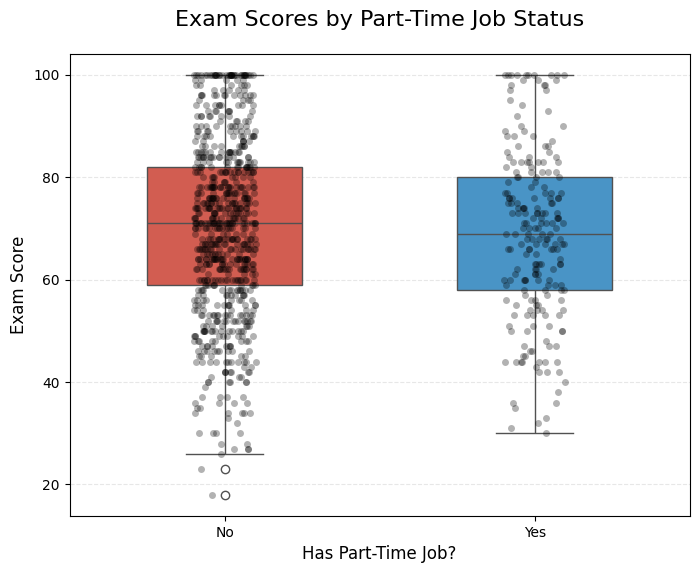

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='part time job',
    y='Score',
    data=f_data,
    palette={'Yes': '#3498DB', 'No': '#E74C3C'},
    width=0.5
)
sns.stripplot(
    x='part time job',
    y='Score',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Exam Scores by Part-Time Job Status', fontsize=16, pad=20)
plt.xlabel('Has Part-Time Job?', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Gender VS Scores

<ipython-input-58-dcda13b10cf1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


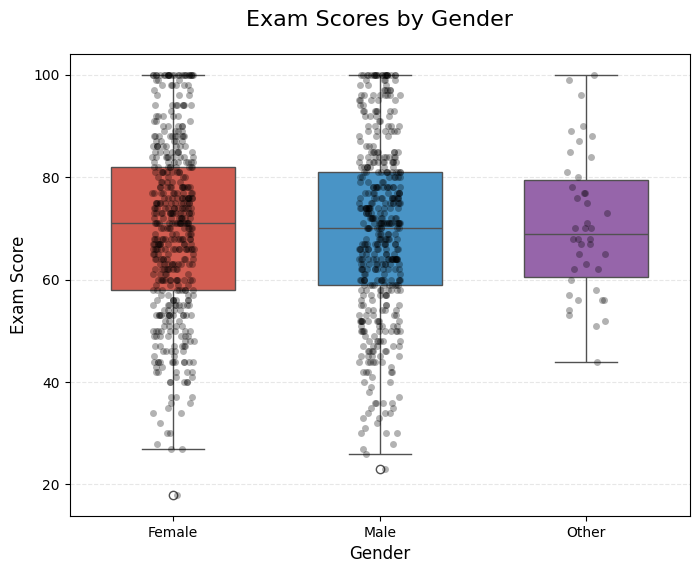

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='gender',
    y='Score',
    data=f_data,
    palette={'Male': '#3498DB', 'Female': '#E74C3C', 'Other': '#9B59B6'},
    width=0.6
)
sns.stripplot(
    x='gender',
    y='Score',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Exam Scores by Gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Diet VS Socres

<ipython-input-59-fd4902801456>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


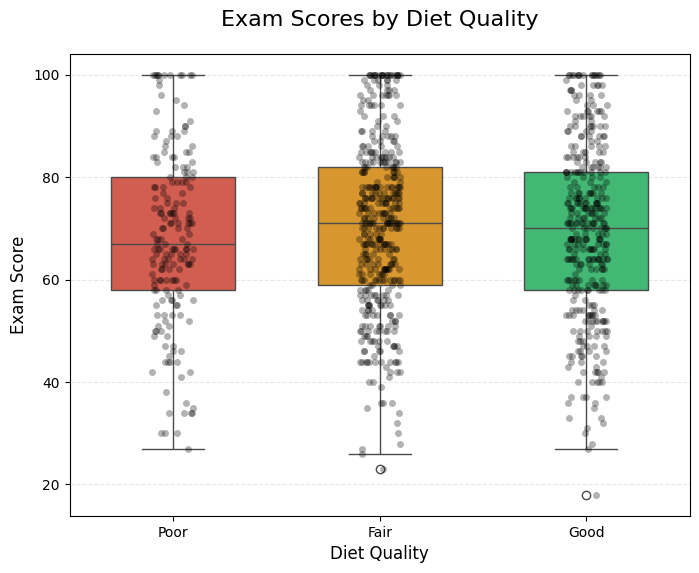

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='diet',
    y='Score',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    palette={'Poor': '#E74C3C', 'Fair': '#F39C12', 'Good': '#2ECC71'},
    width=0.6
)
sns.stripplot(
    x='diet',
    y='Score',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Exam Scores by Diet Quality', fontsize=16, pad=20)
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Education VS socres

<ipython-input-60-e8b2062561fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


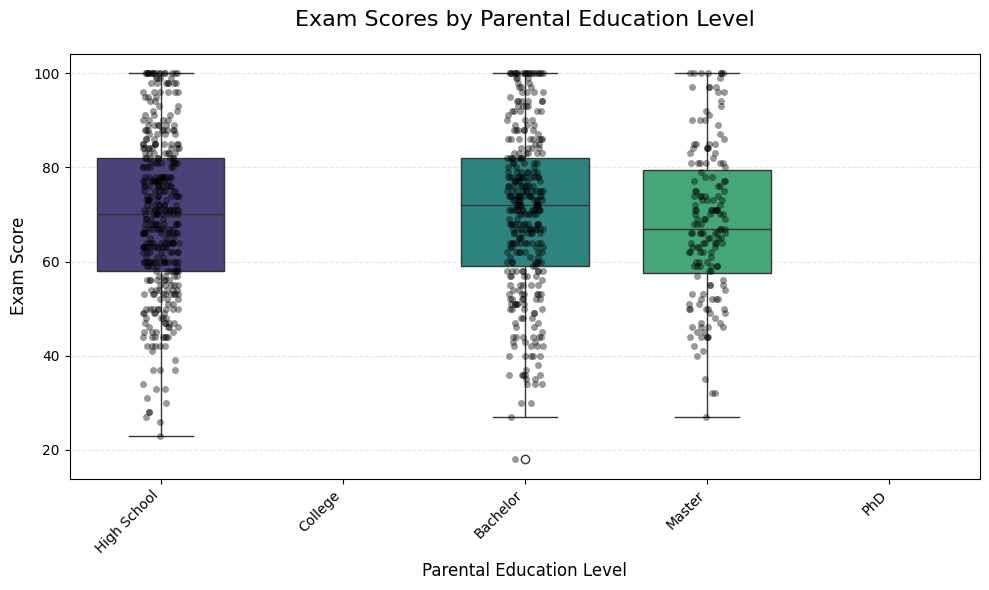

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='education level',
    y='Score',
    data=f_data,
    order=['High School', 'College', 'Bachelor', 'Master', 'PhD'],
    palette='viridis',
    width=0.7
)
sns.stripplot(
    x='education level',
    y='Score',
    data=f_data,
    order=['High School', 'College', 'Bachelor', 'Master', 'PhD'],
    color='black',
    alpha=0.4,
    jitter=True
)
plt.title('Exam Scores by Parental Education Level', fontsize=16, pad=20)
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Internet VS Scores

<ipython-input-61-4b11bdf158be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


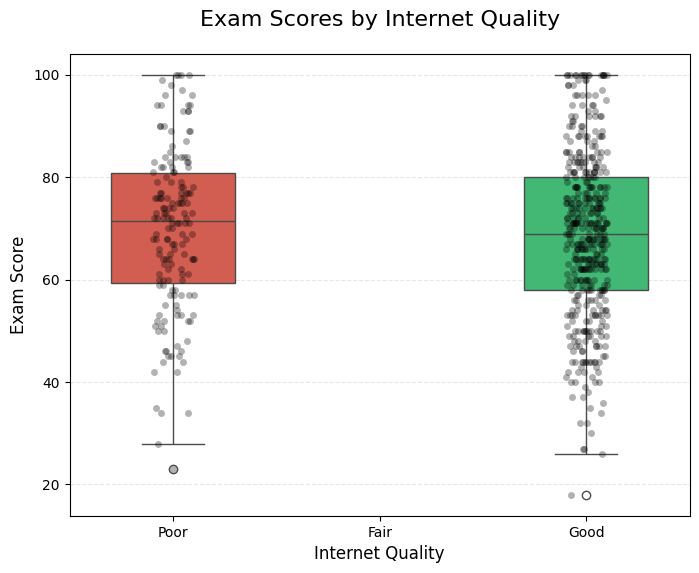

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='internet',
    y='Score',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    palette={'Poor': '#E74C3C', 'Fair': '#F39C12', 'Good': '#2ECC71'},
    width=0.6
)
sns.stripplot(
    x='internet',
    y='Score',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Exam Scores by Internet Quality', fontsize=16, pad=20)
plt.xlabel('Internet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Participation VS Socres

<ipython-input-62-08761feb6b6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


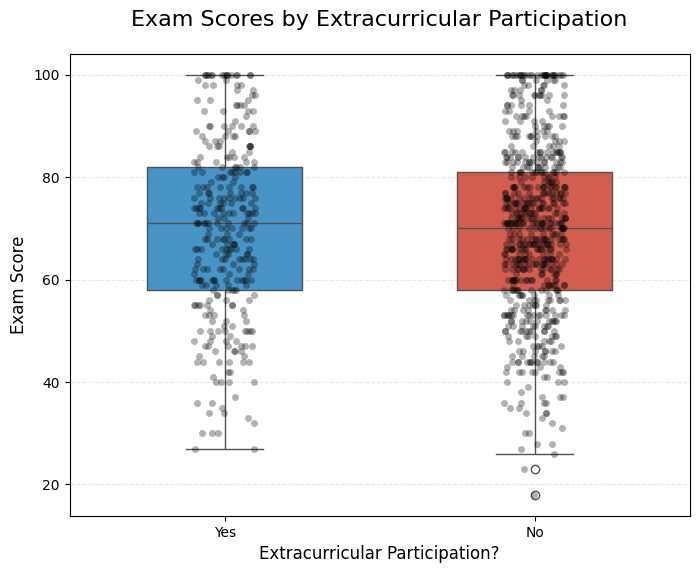

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='participation',
    y='Score',
    data=f_data,
    palette={'Yes': '#3498DB', 'No': '#E74C3C'},
    width=0.5
)
sns.stripplot(
    x='participation',
    y='Score',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Exam Scores by Extracurricular Participation', fontsize=16, pad=20)
plt.xlabel('Extracurricular Participation?', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Age VS Scores

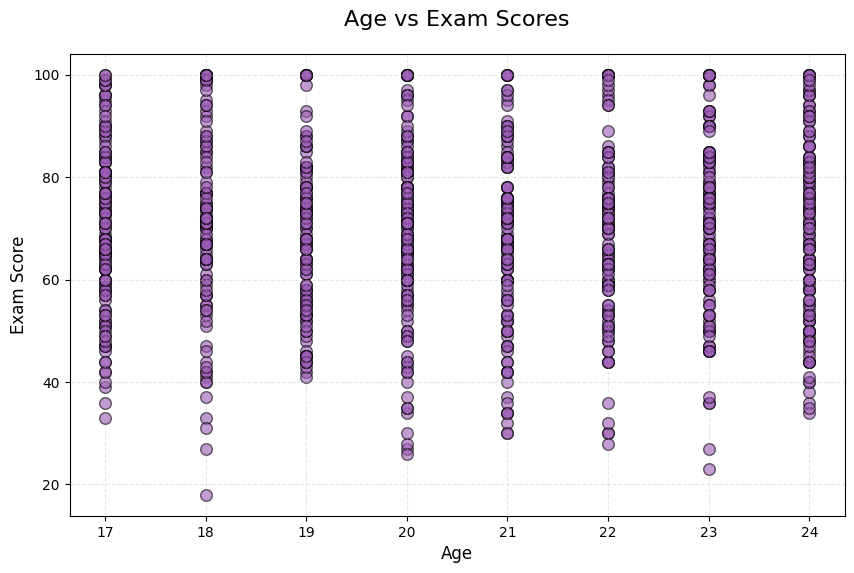

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['age'],
    y=f_data['Score'],
    c='#9B59B6',
    alpha=0.6,
    edgecolor='black',
    s=70
)
plt.title('Age vs Exam Scores', fontsize=16, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Internet VS Study Hours

<ipython-input-64-b9335ae803a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


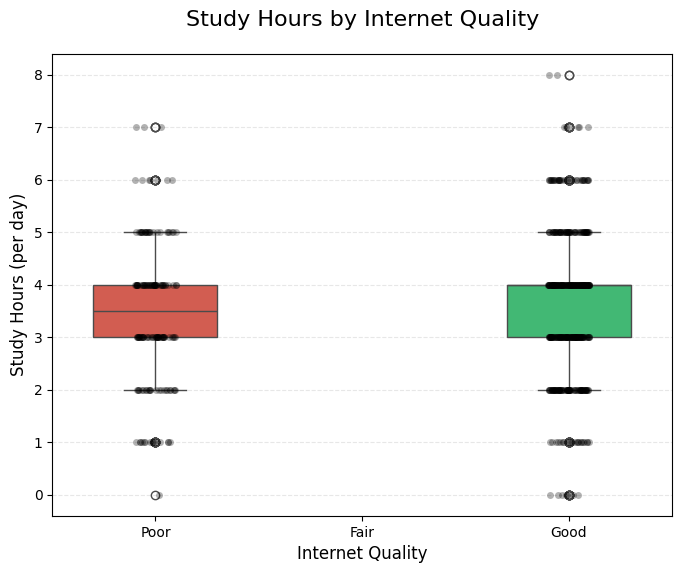

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='internet',
    y='Study hours',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    palette={'Poor': '#E74C3C', 'Fair': '#F39C12', 'Good': '#2ECC71'},
    width=0.6
)
sns.stripplot(
    x='internet',
    y='Study hours',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Study Hours by Internet Quality', fontsize=16, pad=20)
plt.xlabel('Internet Quality', fontsize=12)
plt.ylabel('Study Hours (per day)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

PArt-time jobs VS study hours

<ipython-input-65-5c64020a98a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


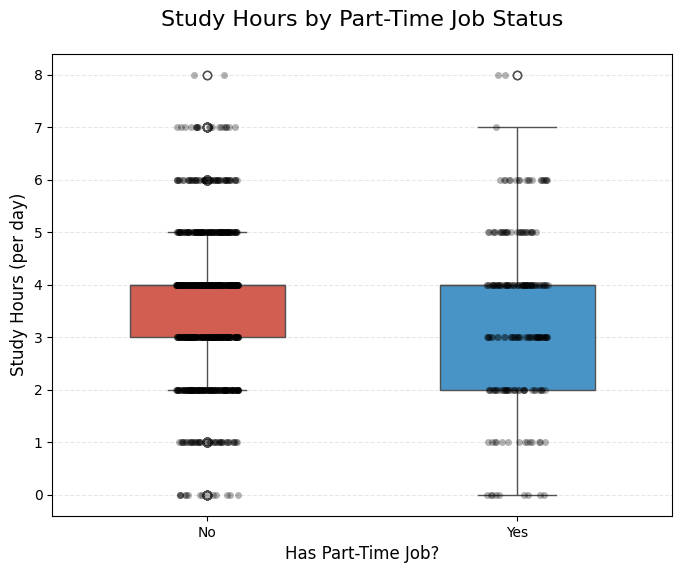

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='part time job',
    y='Study hours',
    data=f_data,
    palette={'Yes': '#3498DB', 'No': '#E74C3C'},
    width=0.5
)
sns.stripplot(
    x='part time job',
    y='Study hours',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Study Hours by Part-Time Job Status', fontsize=16, pad=20)
plt.xlabel('Has Part-Time Job?', fontsize=12)
plt.ylabel('Study Hours (per day)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Gender VS Study Hours

<ipython-input-66-1c3caab084bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


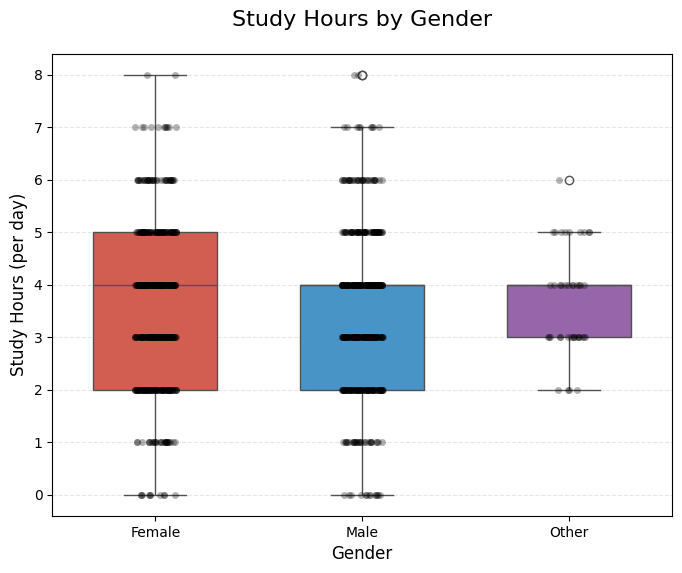

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='gender',
    y='Study hours',
    data=f_data,
    palette={'Male': '#3498DB', 'Female': '#E74C3C', 'Other': '#9B59B6'},
    width=0.6
)
sns.stripplot(
    x='gender',
    y='Study hours',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Study Hours by Gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Study Hours (per day)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Education VS Study Hours

<ipython-input-67-671c83f164ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


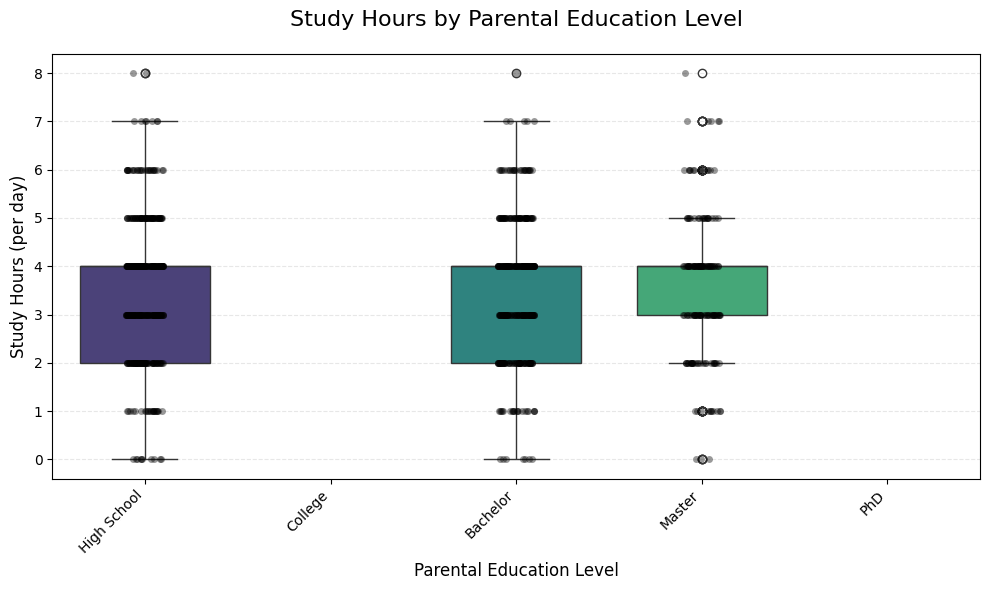

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='education level',
    y='Study hours',
    data=f_data,
    order=['High School', 'College', 'Bachelor', 'Master', 'PhD'],
    palette='viridis',
    width=0.7
)
sns.stripplot(
    x='education level',
    y='Study hours',
    data=f_data,
    order=['High School', 'College', 'Bachelor', 'Master', 'PhD'],
    color='black',
    alpha=0.4,
    jitter=True
)
plt.title('Study Hours by Parental Education Level', fontsize=16, pad=20)
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Study Hours (per day)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Diet quality VS Study hours

<ipython-input-69-9ef9f5d9c7cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


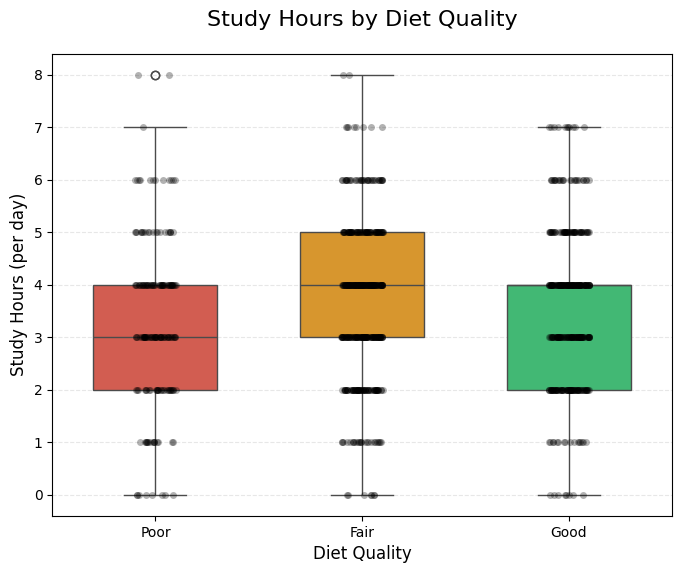

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='diet',
    y='Study hours',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    palette={'Poor': '#E74C3C', 'Fair': '#F39C12', 'Good': '#2ECC71'},
    width=0.6
)
sns.stripplot(
    x='diet',
    y='Study hours',
    data=f_data,
    order=['Poor', 'Fair', 'Good'],
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Study Hours by Diet Quality', fontsize=16, pad=20)
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Study Hours (per day)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Exercise VS mental health

<ipython-input-70-d314712c5894>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


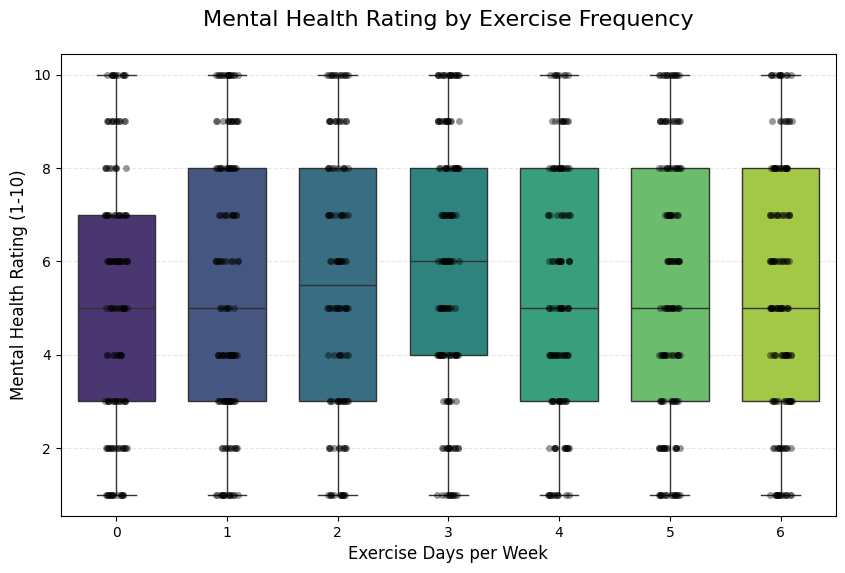

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='exercise/week',
    y='mental health rating',
    data=f_data,
    palette='viridis',
    width=0.7
)
sns.stripplot(
    x='exercise/week',
    y='mental health rating',
    data=f_data,
    color='black',
    alpha=0.4,
    jitter=True
)
plt.title('Mental Health Rating by Exercise Frequency', fontsize=16, pad=20)
plt.xlabel('Exercise Days per Week', fontsize=12)
plt.ylabel('Mental Health Rating (1-10)', fontsize=12)
plt.xticks(range(0, 7))
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

Sleeping hours VS Mental health

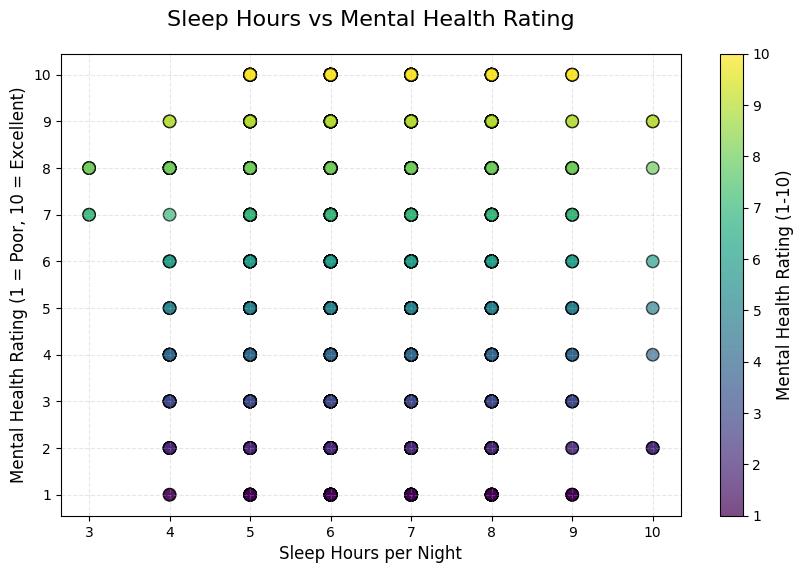

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['sleep'],
    y=f_data['mental health rating'],
    c=f_data['mental health rating'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='black',
    s=80
)
cbar = plt.colorbar()
cbar.set_label('Mental Health Rating (1-10)', fontsize=12)
plt.title('Sleep Hours vs Mental Health Rating', fontsize=16, pad=20)
plt.xlabel('Sleep Hours per Night', fontsize=12)
plt.ylabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.xticks(range(3, 11))
plt.yticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Social meadia VS mental health

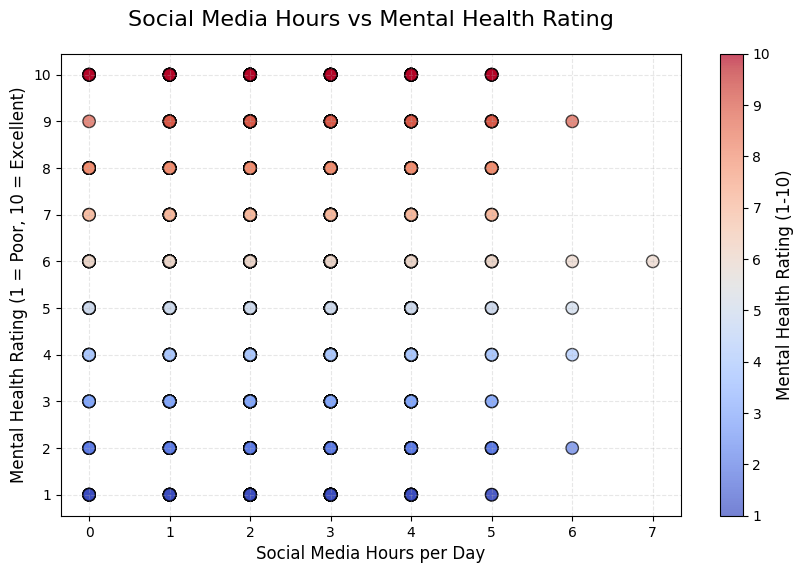

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['social media'],
    y=f_data['mental health rating'],
    c=f_data['mental health rating'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolor='black',
    s=80
)
cbar = plt.colorbar()
cbar.set_label('Mental Health Rating (1-10)', fontsize=12)
plt.title('Social Media Hours vs Mental Health Rating', fontsize=16, pad=20)
plt.xlabel('Social Media Hours per Day', fontsize=12)
plt.ylabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.xticks(range(0, int(f_data['social media'].max()) + 1))
plt.yticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Netflix VS mental health

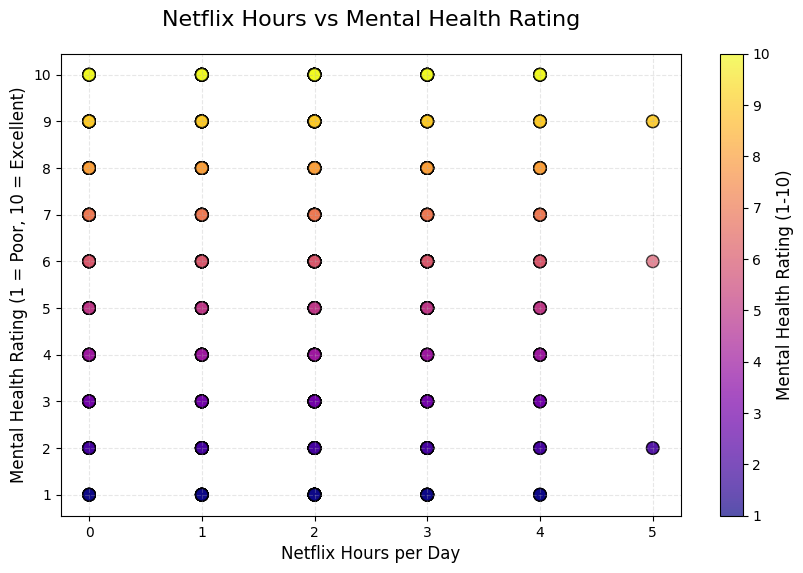

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['netflix'],
    y=f_data['mental health rating'],
    c=f_data['mental health rating'],
    cmap='plasma',
    alpha=0.7,
    edgecolor='black',
    s=80
)
cbar = plt.colorbar()
cbar.set_label('Mental Health Rating (1-10)', fontsize=12)
plt.title('Netflix Hours vs Mental Health Rating', fontsize=16, pad=20)
plt.xlabel('Netflix Hours per Day', fontsize=12)
plt.ylabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.xticks(range(0, int(f_data['netflix'].max()) + 1))
plt.yticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Attendance VS mental health

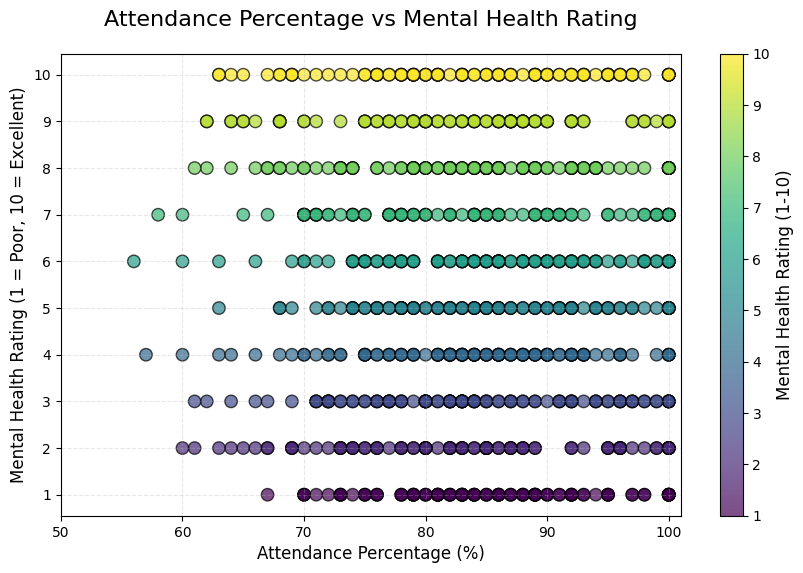

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=f_data['attendance'],
    y=f_data['mental health rating'],
    c=f_data['mental health rating'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='black',
    s=80
)
cbar = plt.colorbar()
cbar.set_label('Mental Health Rating (1-10)', fontsize=12)
plt.title('Attendance Percentage vs Mental Health Rating', fontsize=16, pad=20)
plt.xlabel('Attendance Percentage (%)', fontsize=12)
plt.ylabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.xlim(50, 101)
plt.yticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

participation vs mental health

<ipython-input-75-aac552c1c6b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


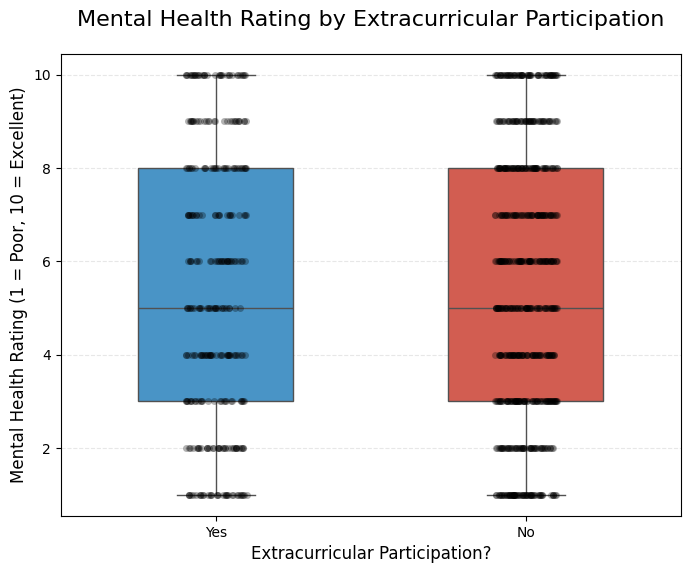

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='participation',
    y='mental health rating',
    data=f_data,
    palette={'Yes': '#3498DB', 'No': '#E74C3C'},
    width=0.5
)
sns.stripplot(
    x='participation',
    y='mental health rating',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True
)
plt.title('Mental Health Rating by Extracurricular Participation', fontsize=16, pad=20)
plt.xlabel('Extracurricular Participation?', fontsize=12)
plt.ylabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()


Study Hours + Internet Quality vs Exam Score

<ipython-input-76-ce6d4701aee8>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = f_data.pivot_table(index='internet_cat', columns='Study hours', values='Score', aggfunc='mean')


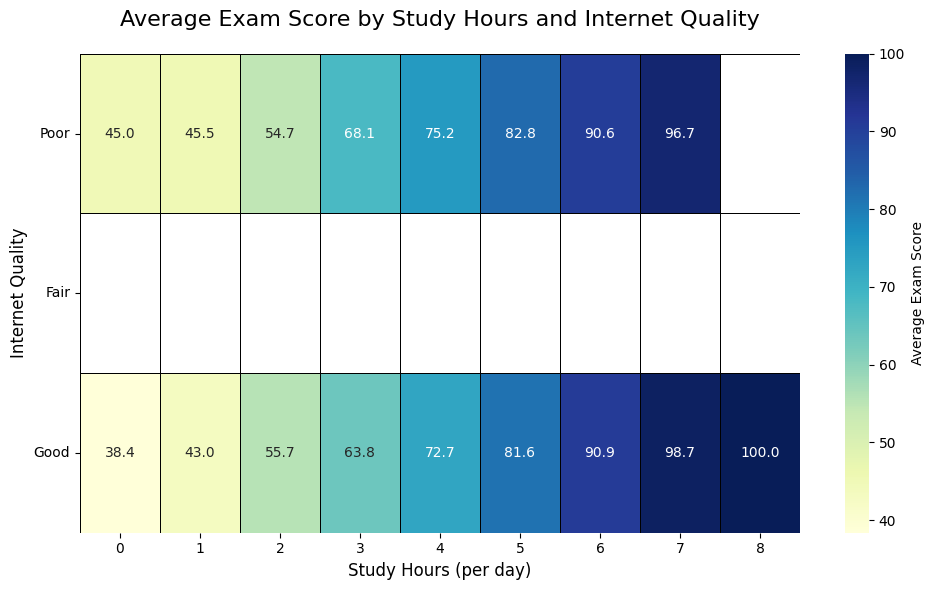

In [76]:
internet_order = ['Poor', 'Fair', 'Good']
f_data['internet_cat'] = pd.Categorical(f_data['internet'], categories=internet_order, ordered=True)
heatmap_data = f_data.pivot_table(index='internet_cat', columns='Study hours', values='Score', aggfunc='mean')
heatmap_data = heatmap_data.reindex(internet_order)
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Average Exam Score'}
)
plt.title('Average Exam Score by Study Hours and Internet Quality', fontsize=16, pad=20)
plt.xlabel('Study Hours (per day)', fontsize=12)
plt.ylabel('Internet Quality', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Sleep Hours + Mental Health vs Exam Score

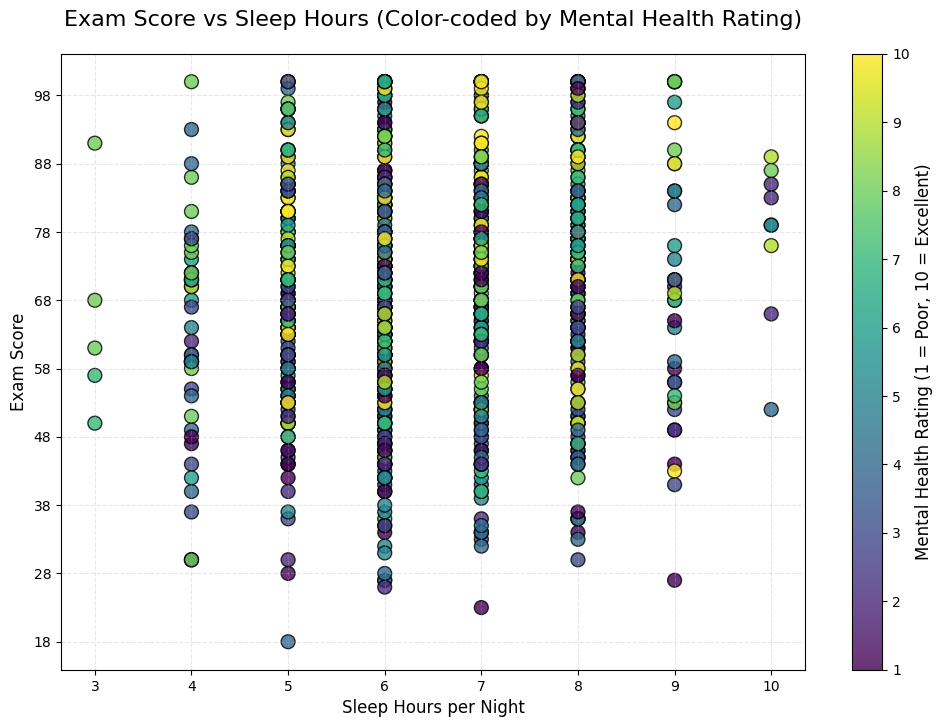

In [77]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=f_data['sleep'],
    y=f_data['Score'],
    c=f_data['mental health rating'],
    cmap='viridis',
    alpha=0.8,
    edgecolor='black',
    s=100
)
cbar = plt.colorbar(scatter)
cbar.set_label('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.title('Exam Score vs Sleep Hours (Color-coded by Mental Health Rating)', fontsize=16, pad=20)
plt.xlabel('Sleep Hours per Night', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(range(int(f_data['sleep'].min()), int(f_data['sleep'].max()) + 1))
plt.yticks(range(int(f_data['Score'].min()), int(f_data['Score'].max()) + 1, 10))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Diet Quality + Exercise Frequency vs Exam Score

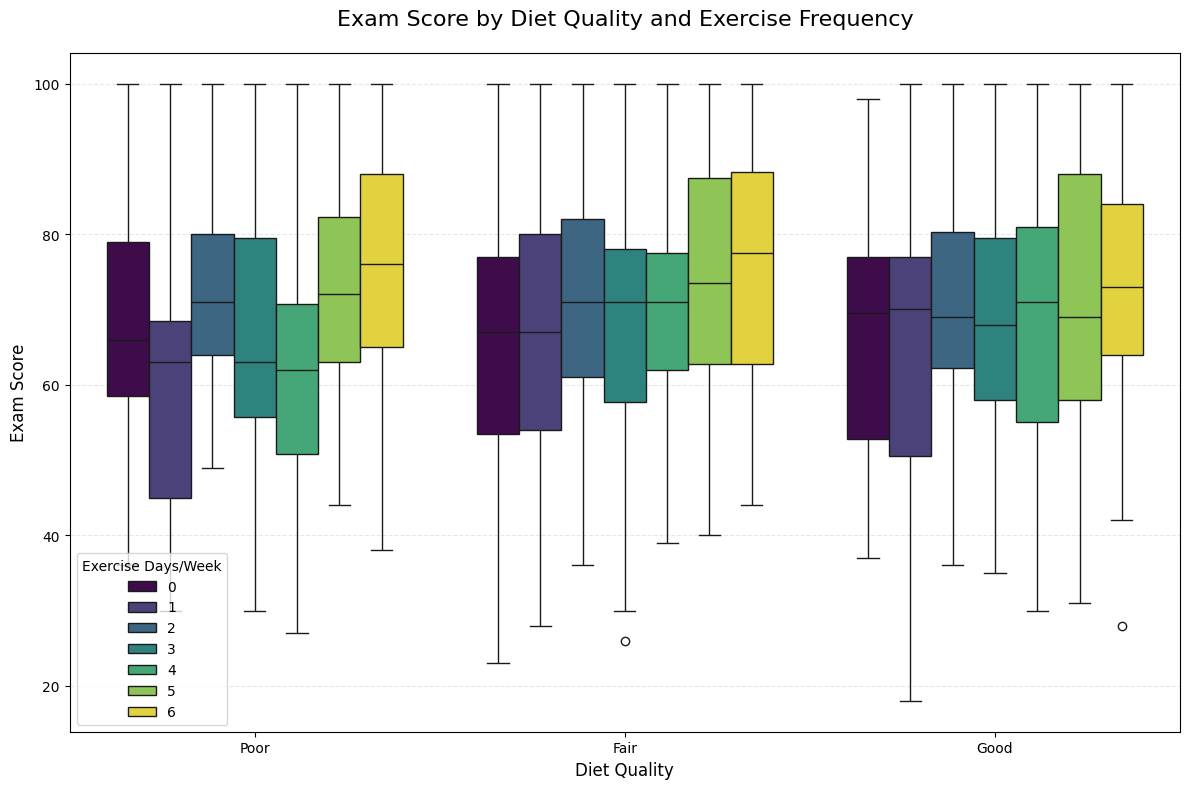

In [78]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=f_data,
    x='diet',
    y='Score',
    hue='exercise/week',
    order=['Poor', 'Fair', 'Good'],
    palette='viridis'
)
plt.title('Exam Score by Diet Quality and Exercise Frequency', fontsize=16, pad=20)
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Exercise Days/Week')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

 Study Hours + Social Media Hours vs Exam Score

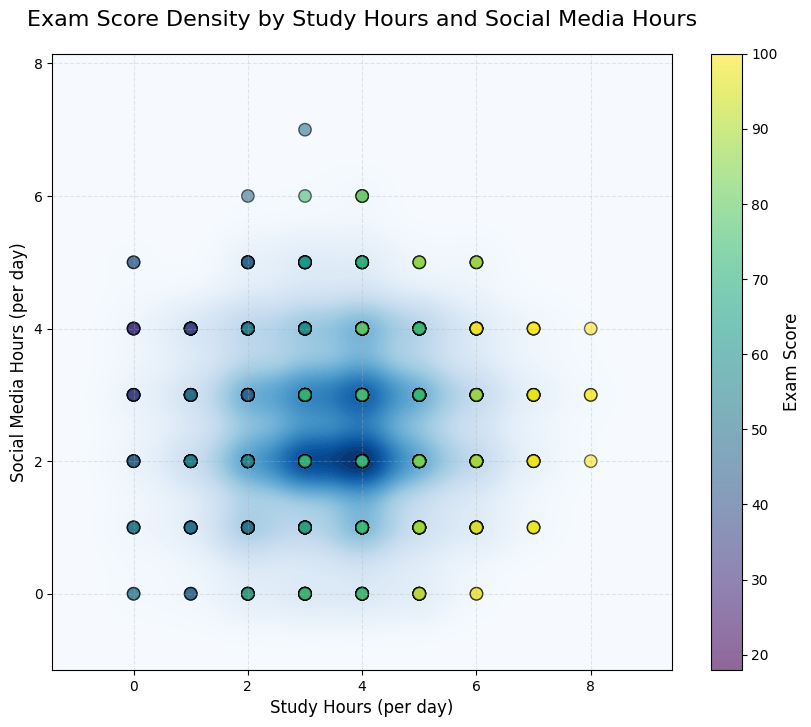

In [80]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=f_data,
    x='Study hours',
    y='social media',
    fill=True,
    cmap='Blues',
    thresh=0,
    levels=100
)
plt.scatter(
    x=f_data['Study hours'],
    y=f_data['social media'],
    c=f_data['Score'],
    cmap='viridis',
    alpha=0.6,
    edgecolor='black',
    s=80
)
cbar = plt.colorbar()
cbar.set_label('Exam Score', fontsize=12)
plt.title('Exam Score Density by Study Hours and Social Media Hours', fontsize=16, pad=20)
plt.xlabel('Study Hours (per day)', fontsize=12)
plt.ylabel('Social Media Hours (per day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Gender + Study Hours vs Exam Score

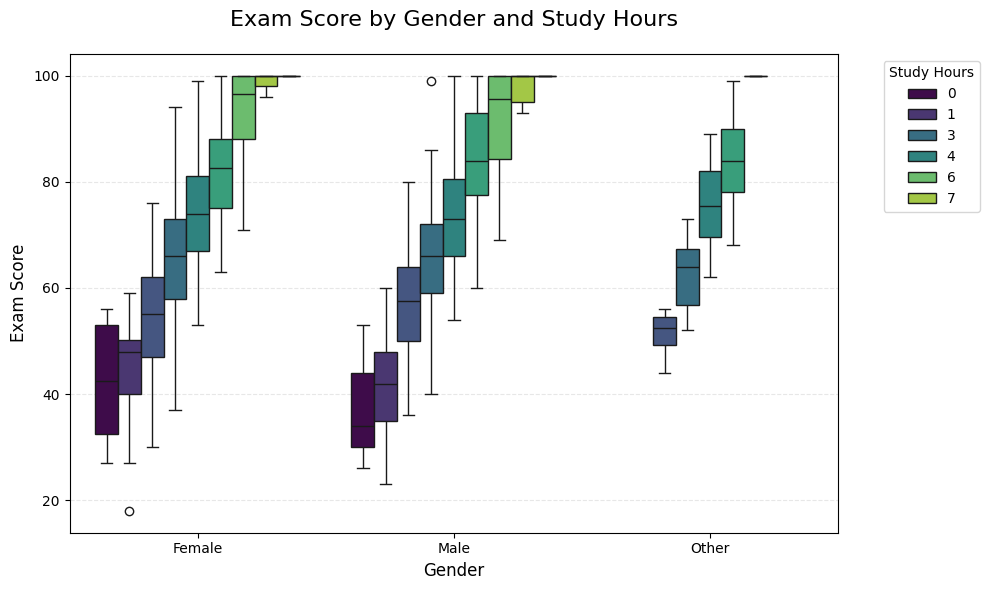

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='gender',
    y='Score',
    hue='Study hours',
    data=f_data,
    palette='viridis'
)
plt.title('Exam Score by Gender and Study Hours', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Study Hours', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Attendance + Part-Time Job vs Exam Score

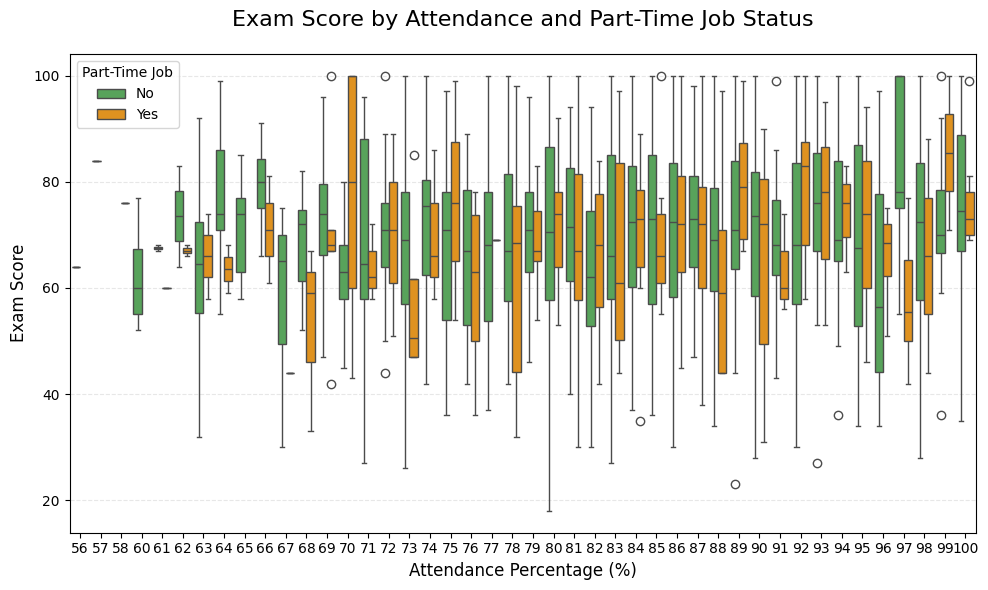

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='attendance',
    y='Score',
    hue='part time job',
    data=f_data,
    palette={'Yes': '#FF9800', 'No': '#4CAF50'}
)
plt.title('Exam Score by Attendance and Part-Time Job Status', fontsize=16, pad=20)
plt.xlabel('Attendance Percentage (%)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Part-Time Job')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Parental Education + Study Hours vs Exam Score

<Figure size 1500x1000 with 0 Axes>

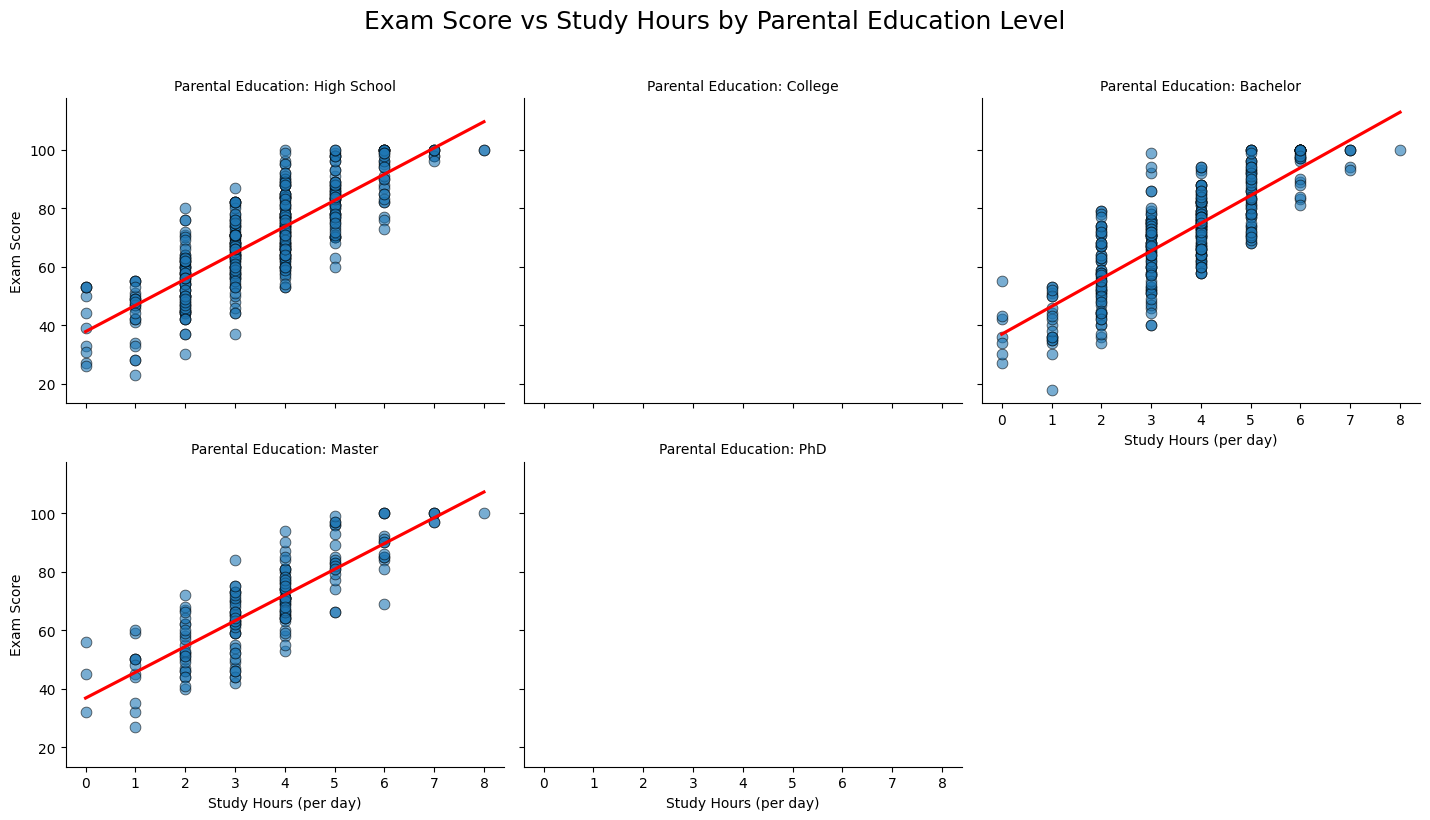

In [83]:

plt.figure(figsize=(15, 10))
g = sns.FacetGrid(
    f_data,
    col='education level',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True,
    col_order=['High School', 'College', 'Bachelor', 'Master', 'PhD']
)
g.map(
    sns.scatterplot,
    'Study hours',
    'Score',
    alpha=0.6,
    edgecolor='black',
    s=60
)
g.map(
    sns.regplot,
    'Study hours',
    'Score',
    scatter=False,
    ci=None,
    color='red'
)
g.set_titles("Parental Education: {col_name}")
g.set_axis_labels("Study Hours (per day)", "Exam Score")
g.fig.suptitle('Exam Score vs Study Hours by Parental Education Level', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

Netflix Hours + Social Media Hours vs Exam Score

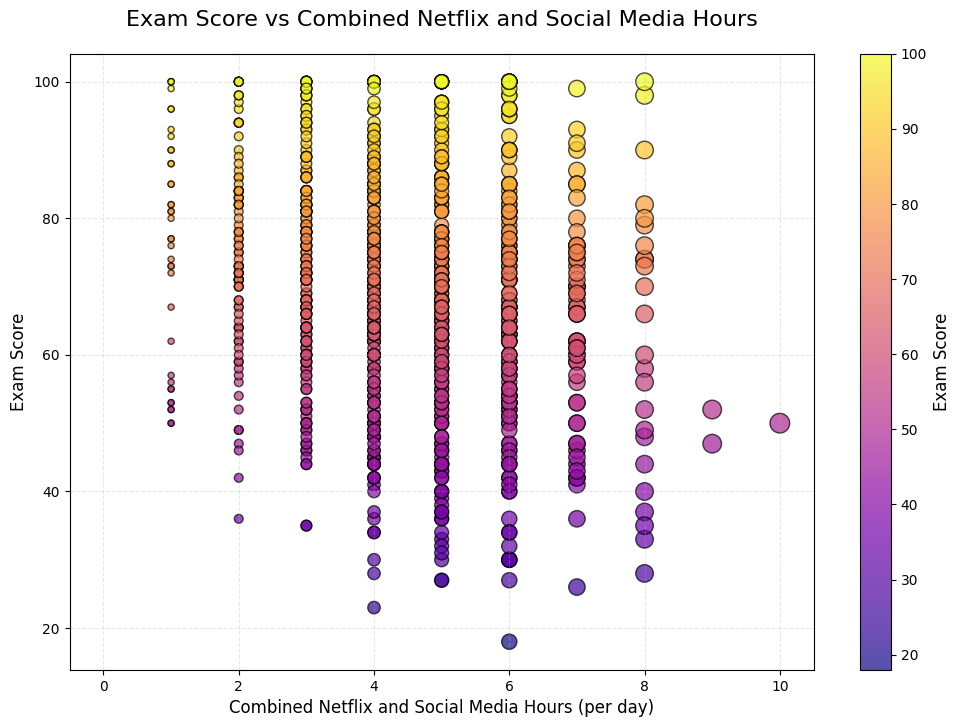

In [84]:
f_data['Combined_Screen_Hours'] = f_data['netflix'] + f_data['social media']
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=f_data['Combined_Screen_Hours'],
    y=f_data['Score'],
    s=f_data['Combined_Screen_Hours'] * 20,
    c=f_data['Score'],
    cmap='plasma',
    alpha=0.7,
    edgecolor='black'
)
cbar = plt.colorbar(scatter)
cbar.set_label('Exam Score', fontsize=12)

plt.title('Exam Score vs Combined Netflix and Social Media Hours', fontsize=16, pad=20)
plt.xlabel('Combined Netflix and Social Media Hours (per day)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Mental Health + Gender vs Exam Score

<ipython-input-85-dea754de491e>:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


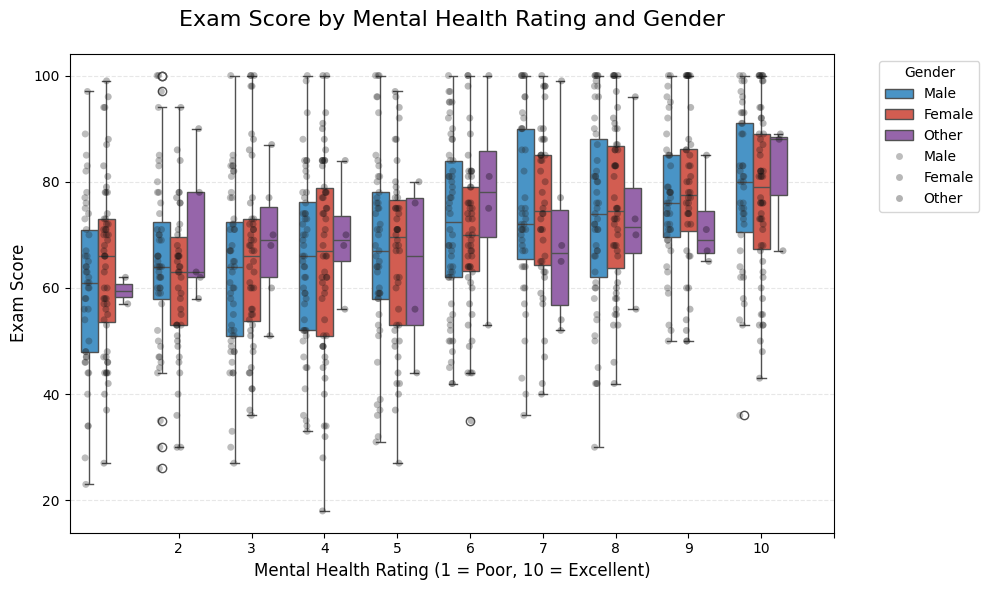

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='mental health rating',
    y='Score',
    hue='gender',
    data=f_data,
    palette={'Male': '#3498DB', 'Female': '#E74C3C', 'Other': '#9B59B6'},
    width=0.7
)
sns.stripplot(
    x='mental health rating',
    y='Score',
    hue='gender',
    data=f_data,
    color='black',
    alpha=0.3,
    jitter=True,
    dodge=True
)
plt.title('Exam Score by Mental Health Rating and Gender', fontsize=16, pad=20)
plt.xlabel('Mental Health Rating (1 = Poor, 10 = Excellent)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(range(1, 11))
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Sleep Hours + Exercise Frequency vs Mental Health Rating

<ipython-input-86-65f510f98fe8>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = f_data.groupby([sleep_bins, exercise_bins])['mental health rating'].mean().unstack()


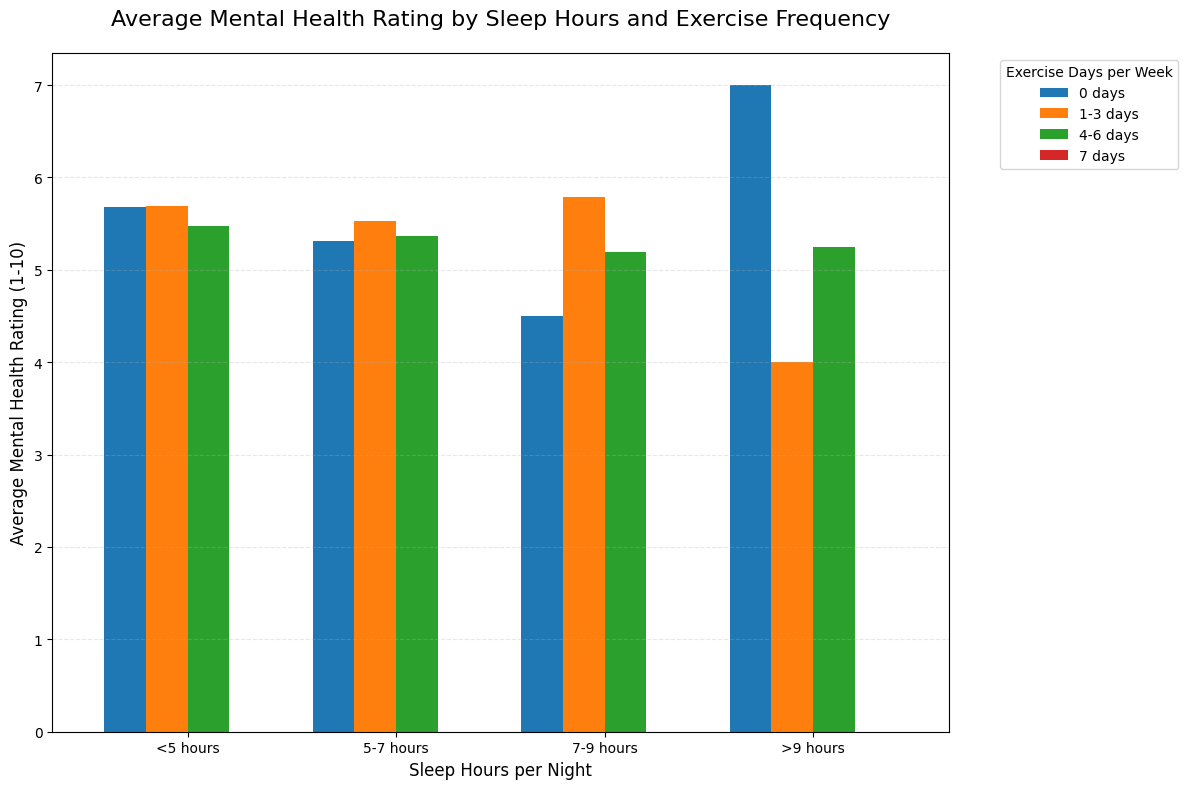

In [86]:
sleep_bins = pd.cut(
    f_data['sleep'],
    bins=[0, 5, 7, 9, 12],
    labels=['<5 hours', '5-7 hours', '7-9 hours', '>9 hours'],
    right=True,
    include_lowest=True
)
exercise_bins = pd.cut(
    f_data['exercise/week'],
    bins=[-1, 0.5, 3.5, 6.5, 7.5],
    labels=['0 days', '1-3 days', '4-6 days', '7 days'],
    right=True,
    include_lowest=True
)
grouped_data = f_data.groupby([sleep_bins, exercise_bins])['mental health rating'].mean().unstack()
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Average Mental Health Rating by Sleep Hours and Exercise Frequency', fontsize=16, pad=20)
plt.xlabel('Sleep Hours per Night', fontsize=12)
plt.ylabel('Average Mental Health Rating (1-10)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Exercise Days per Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()